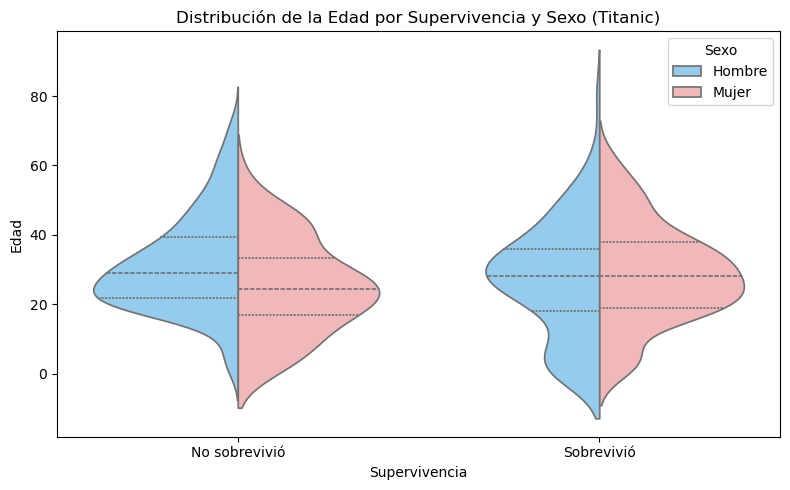

In [3]:
# pip install seaborn matplotlib pandas

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar datos (ajusta la ruta si hace falta)
titanic = pd.read_csv("DATOS/Titanic-Dataset.csv")

# Normalizar columnas
titanic.columns = [c.strip().title() for c in titanic.columns]

# Convertir a numérico (errores → NaN)
titanic["Age"] = pd.to_numeric(titanic["Age"], errors="coerce")

# Quitar negativos o valores absurdos (>100)
titanic = titanic[(titanic["Age"] >= 0) & (titanic["Age"] <= 100)]
# Mapear etiquetas legibles
map_surv   = {0: "No sobrevivió", 1: "Sobrevivió"}
map_sex    = {"female": "Mujer", "male": "Hombre"}

titanic["Survived_lbl"] = titanic["Survived"].map(map_surv)
titanic["Sex_lbl"] = titanic["Sex"].map(map_sex)

# --- Crear violin plot ---
plt.figure(figsize=(8,5))
sns.violinplot(
    data=titanic,
    x="Survived_lbl",
    y="Age",
    hue="Sex_lbl",
    split=True,
    inner="quart",
    palette={"Mujer": "#F9AFAF", "Hombre": "#87CEFA"}
)

plt.title("Distribución de la Edad por Supervivencia y Sexo (Titanic)")
plt.xlabel("Supervivencia")
plt.ylabel("Edad")
plt.legend(title="Sexo")
plt.tight_layout()
plt.show()


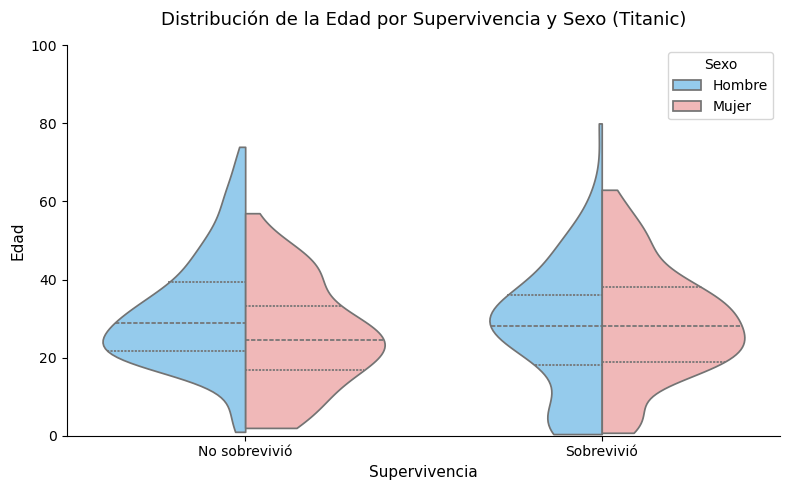